# Import Libraries


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
video_name = 'PushUp2.mp4'
video_path = 'Videos/' + video_name
dataset_name = 'pose_landmark_data_' + video_name.split('.')[0] + '.xlsx'
dataset_path = 'Datasets/'

##Read keypoints data

In [3]:
df = pd.read_excel(dataset_path + dataset_name)

##Remove z keypoints

In [4]:
for i in df.columns:
    if i.split('_')[-1] == 'z':
        df.drop(i, axis=1, inplace=True)

In [5]:
df.head()

,Frame_Number,NOSE_Point_x,NOSE_Point_y,NOSE_visibility,LEFT_EYE_INNER_Point_x,LEFT_EYE_INNER_Point_y,LEFT_EYE_INNER_visibility,LEFT_EYE_Point_x,LEFT_EYE_Point_y,LEFT_EYE_visibility,...,LEFT_HEEL_visibility,RIGHT_HEEL_Point_x,RIGHT_HEEL_Point_y,RIGHT_HEEL_visibility,LEFT_FOOT_INDEX_Point_x,LEFT_FOOT_INDEX_Point_y,LEFT_FOOT_INDEX_visibility,RIGHT_FOOT_INDEX_Point_x,RIGHT_FOOT_INDEX_Point_y,RIGHT_FOOT_INDEX_visibility
0,11,0.172681,0.313598,0.999459,0.168347,0.283569,0.999629,0.169163,0.282909,0.999499,...,0.394755,0.649724,0.761759,0.167403,0.634239,0.775647,0.224308,0.630510,0.785381,0.079859
1,12,0.171384,0.325920,0.999407,0.169135,0.290780,0.999529,0.172524,0.287031,0.999359,...,0.378576,0.358859,0.774496,0.155693,0.688360,0.818098,0.248254,0.297742,0.809972,0.083065
2,13,0.166956,0.344291,0.999323,0.169170,0.305753,0.999371,0.174378,0.299845,0.999245,...,0.428402,0.602920,0.744963,0.198360,0.674279,0.849738,0.319854,0.563115,0.842989,0.152828
3,14,0.152157,0.360589,0.999005,0.156891,0.323934,0.999098,0.164263,0.318774,0.998894,...,0.441146,0.632552,0.734129,0.191147,0.666381,0.845441,0.365483,0.618406,0.828718,0.165179
4,15,0.154514,0.375807,0.998804,0.157947,0.339088,0.998869,0.165530,0.333139,0.998589,...,0.462459,0.649224,0.732318,0.193904,0.674033,0.854672,0.416111,0.633172,0.838736,0.192938


##Get column name

In [6]:
num = 0
for i in range(len(df.columns[1:])):
    if i != 0 and i % 2 != 0:
        num += 1
        print(num, df.columns[i], df.columns[i + 1])

1 NOSE_Point_x NOSE_Point_y
2 NOSE_visibility LEFT_EYE_INNER_Point_x
3 LEFT_EYE_INNER_Point_y LEFT_EYE_INNER_visibility
4 LEFT_EYE_Point_x LEFT_EYE_Point_y
5 LEFT_EYE_visibility LEFT_EYE_OUTER_Point_x
6 LEFT_EYE_OUTER_Point_y LEFT_EYE_OUTER_visibility
7 RIGHT_EYE_INNER_Point_x RIGHT_EYE_INNER_Point_y
8 RIGHT_EYE_INNER_visibility RIGHT_EYE_Point_x
9 RIGHT_EYE_Point_y RIGHT_EYE_visibility
10 RIGHT_EYE_OUTER_Point_x RIGHT_EYE_OUTER_Point_y
11 RIGHT_EYE_OUTER_visibility LEFT_EAR_Point_x
12 LEFT_EAR_Point_y LEFT_EAR_visibility
13 RIGHT_EAR_Point_x RIGHT_EAR_Point_y
14 RIGHT_EAR_visibility MOUTH_LEFT_Point_x
15 MOUTH_LEFT_Point_y MOUTH_LEFT_visibility
16 MOUTH_RIGHT_Point_x MOUTH_RIGHT_Point_y
17 MOUTH_RIGHT_visibility LEFT_SHOULDER_Point_x
18 LEFT_SHOULDER_Point_y LEFT_SHOULDER_visibility
19 RIGHT_SHOULDER_Point_x RIGHT_SHOULDER_Point_y
20 RIGHT_SHOULDER_visibility LEFT_ELBOW_Point_x
21 LEFT_ELBOW_Point_y LEFT_ELBOW_visibility
22 RIGHT_ELBOW_Point_x RIGHT_ELBOW_Point_y
23 RIGHT_ELBOW_visibi

##Calculate angle function

In [7]:
# Assuming df is your DataFrame
def calculate_angle(row):
    import math
    row = abs(row)

    # Accessing columns by their index positions (0 to 5) from the row
    radians = math.atan2(row[5] - row[3], row[4] - row[2]) - math.atan2(row[1] - row[3], row[0] - row[2])
    angle = math.degrees(radians)
    if angle < 0:
        angle += 360
    return angle

##New dataframe for angles

In [8]:
Angles_df = pd.DataFrame()
Angles_df['Frame_Number'] = df['Frame_Number']
Angles_df

,Frame_Number
0,11
1,12
2,13
3,14
4,15
...,...
382,393
383,394
384,395
385,396


##Generate angles from keypoints

In [9]:
####################Angles
##########################################SHOULDER

# LEFT_SHOULDER
left_shoulder = df[[
    'LEFT_ELBOW_Point_x', 'LEFT_ELBOW_Point_y',
    'LEFT_SHOULDER_Point_x', 'LEFT_SHOULDER_Point_y',
    'LEFT_HIP_Point_x', 'LEFT_HIP_Point_y'
]]
Angles_df['Left_Shoulder_Angle'] = left_shoulder.apply(calculate_angle, axis=1)

# RIGHT_SHOULDER
right_shoulder = df[[
    'RIGHT_ELBOW_Point_x', 'RIGHT_ELBOW_Point_y',
    'RIGHT_SHOULDER_Point_x', 'RIGHT_SHOULDER_Point_y',
    'RIGHT_HIP_Point_x', 'RIGHT_HIP_Point_y'
]]
Angles_df['Right_Shoulder_Angle'] = right_shoulder.apply(calculate_angle, axis=1)

###########################################ELBOW

# LEFT_ELBOW
left_elbow = df[[
    'LEFT_WRIST_Point_x', 'LEFT_WRIST_Point_y',
    'LEFT_ELBOW_Point_x', 'LEFT_ELBOW_Point_y',
    'LEFT_SHOULDER_Point_x', 'LEFT_SHOULDER_Point_y'
]]
Angles_df['Left_Elbow_Angle'] = left_elbow.apply(calculate_angle, axis=1)

# RIGHT_ELBOW
right_elbow = df[[
    'RIGHT_WRIST_Point_x', 'RIGHT_WRIST_Point_y',
    'RIGHT_ELBOW_Point_x', 'RIGHT_ELBOW_Point_y',
    'RIGHT_SHOULDER_Point_x', 'RIGHT_SHOULDER_Point_y'
]]
Angles_df['Right_Elbow_Angle'] = right_elbow.apply(calculate_angle, axis=1)

#############################################WRIST

# LEFT_WRIST
left_wrist = df[[
    'LEFT_ELBOW_Point_x', 'LEFT_ELBOW_Point_y',
    'LEFT_WRIST_Point_x', 'LEFT_WRIST_Point_y',
    'LEFT_SHOULDER_Point_x', 'LEFT_SHOULDER_Point_y'
]]
Angles_df['Left_Wrist_Angle'] = left_wrist.apply(calculate_angle, axis=1)

# RIGHT_WRIST
right_wrist = df[[
    'RIGHT_ELBOW_Point_x', 'RIGHT_ELBOW_Point_y',
    'RIGHT_WRIST_Point_x', 'RIGHT_WRIST_Point_y',
    'RIGHT_SHOULDER_Point_x', 'RIGHT_SHOULDER_Point_y'
]]
Angles_df['Right_Wrist_Angle'] = right_wrist.apply(calculate_angle, axis=1)

##############################################HIP

# LEFT_HIP
left_hip = df[[
    'LEFT_SHOULDER_Point_x', 'LEFT_SHOULDER_Point_y',
    'LEFT_HIP_Point_x', 'LEFT_HIP_Point_y',
    'LEFT_KNEE_Point_x', 'LEFT_KNEE_Point_y'
]]
Angles_df['Left_Hip_Angle'] = left_hip.apply(calculate_angle, axis=1)

# RIGHT_HIP
right_hip = df[[
    'RIGHT_SHOULDER_Point_x', 'RIGHT_SHOULDER_Point_y',
    'RIGHT_HIP_Point_x', 'RIGHT_HIP_Point_y',
    'RIGHT_KNEE_Point_x', 'RIGHT_KNEE_Point_y'
]]
Angles_df['Right_Hip_Angle'] = right_hip.apply(calculate_angle, axis=1)

##############################################KNEE

# LEFT_KNEE
left_knee = df[[
    'LEFT_HIP_Point_x', 'LEFT_HIP_Point_y',
    'LEFT_KNEE_Point_x', 'LEFT_KNEE_Point_y',
    'LEFT_ANKLE_Point_x', 'LEFT_ANKLE_Point_y'
]]
Angles_df['Left_Knee_Angle'] = left_knee.apply(calculate_angle, axis=1)

#RIGHT_KNEE

Right_Knee = df[[
    'RIGHT_HIP_Point_x', 'RIGHT_HIP_Point_y',
    'RIGHT_KNEE_Point_x', 'RIGHT_KNEE_Point_y',
    'RIGHT_ANKLE_Point_x', 'RIGHT_ANKLE_Point_y'
]]
Angles_df['Right_Knee_Angle'] = Right_Knee.apply(calculate_angle, axis=1)

###################################################NECK
Neck = df[[
    'LEFT_SHOULDER_Point_x', 'LEFT_SHOULDER_Point_y',
    'NOSE_Point_x', 'NOSE_Point_y',
    'RIGHT_SHOULDER_Point_x', 'RIGHT_SHOULDER_Point_y'
]]
Angles_df['Neck_Angle'] = Neck.apply(calculate_angle, axis=1)

###############################################ANKLE

#LEFT_ANKLE
Left_Ankle = df[[
    'LEFT_KNEE_Point_x', 'LEFT_KNEE_Point_y',
    'LEFT_ANKLE_Point_x', 'LEFT_ANKLE_Point_y',
    'LEFT_HEEL_Point_x', 'LEFT_HEEL_Point_y'
]]
Angles_df['Left_Ankle_Angle'] = Left_Ankle.apply(calculate_angle, axis=1)

#RIGHT_ANKLE

Right_Ankle = df[[
    'RIGHT_KNEE_Point_x', 'RIGHT_KNEE_Point_y',
    'RIGHT_ANKLE_Point_x', 'RIGHT_ANKLE_Point_y',
    'RIGHT_HEEL_Point_x', 'RIGHT_HEEL_Point_y'
]]
Angles_df['Right_Ankle_Angle'] = Right_Ankle.apply(calculate_angle, axis=1)

################################################HEEL

#LEFT_HEEL

Left_Heel = df[[
    'LEFT_ANKLE_Point_x', 'LEFT_ANKLE_Point_y',
    'LEFT_HEEL_Point_x', 'LEFT_HEEL_Point_y',
    'LEFT_FOOT_INDEX_Point_x', 'LEFT_FOOT_INDEX_Point_y'
]]
Angles_df['Left_Heel_Angle'] = Left_Heel.apply(calculate_angle, axis=1)

#RIGHT_HEEL

Right_Heel = df[[
    'RIGHT_ANKLE_Point_x', 'RIGHT_ANKLE_Point_y',
    'RIGHT_HEEL_Point_x', 'RIGHT_HEEL_Point_y',
    'RIGHT_FOOT_INDEX_Point_x', 'RIGHT_FOOT_INDEX_Point_y'
]]
Angles_df['Right_Heel_Angle'] = Right_Heel.apply(calculate_angle, axis=1)

################################################FOOT_INDEX

#LEFT_FOOT_INDEX

Left_Foot_Index = df[[
    'LEFT_ANKLE_Point_x', 'LEFT_ANKLE_Point_y',
    'LEFT_FOOT_INDEX_Point_x', 'LEFT_FOOT_INDEX_Point_y',
    'LEFT_HEEL_Point_x', 'LEFT_HEEL_Point_y'
]]
Angles_df['Left_Foot_Index_Angle'] = Left_Foot_Index.apply(calculate_angle, axis=1)

#RIGHT_FOOT_INDEX
Right_Foot_Index = df[[
    'RIGHT_ANKLE_Point_x', 'RIGHT_ANKLE_Point_y',
    'RIGHT_FOOT_INDEX_Point_x', 'RIGHT_FOOT_INDEX_Point_y',
    'RIGHT_HEEL_Point_x', 'RIGHT_HEEL_Point_y'
]]
Angles_df['Right_Foot_Index_Angle'] = Right_Foot_Index.apply(calculate_angle, axis=1)

## Check correlation

In [10]:
correlation_matrix = Angles_df.corr()

# Display correlations
print("Correlation Matrix:")

Correlation Matrix:


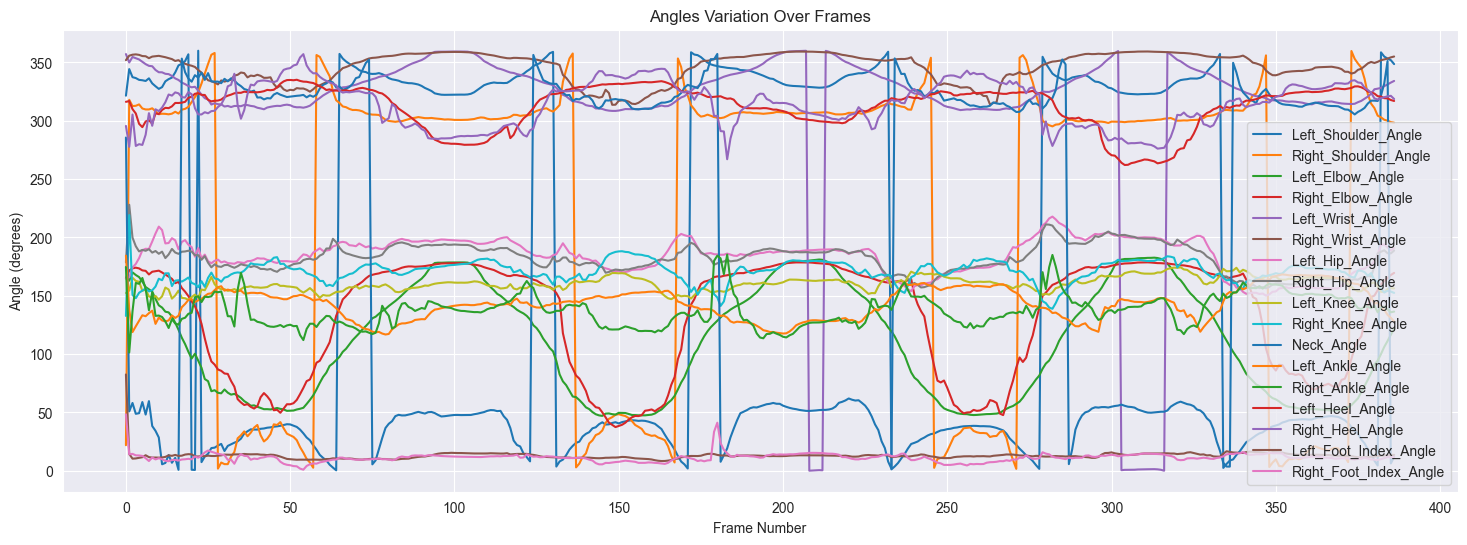

In [11]:
# Set 'Frame_Number' column as the index 
Angles_df.set_index('Frame_Number', inplace=False)

# Plot all columns 
plt.figure(figsize=(18, 6)) 
for column in Angles_df.columns:
    if column != 'Frame_Number':
        plt.plot(Angles_df.index, Angles_df[column], label=column)

plt.xlabel('Frame Number')
plt.ylabel('Angle (degrees)')
plt.title('Angles Variation Over Frames')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
Angles_df

,Frame_Number,Left_Shoulder_Angle,Right_Shoulder_Angle,Left_Elbow_Angle,Right_Elbow_Angle,Left_Wrist_Angle,Right_Wrist_Angle,Left_Hip_Angle,Right_Hip_Angle,Left_Knee_Angle,Right_Knee_Angle,Neck_Angle,Left_Ankle_Angle,Right_Ankle_Angle,Left_Heel_Angle,Right_Heel_Angle,Left_Foot_Index_Angle,Right_Foot_Index_Angle
0,11,321.401825,21.871791,174.850113,164.900213,357.076759,351.868055,164.828972,178.633216,152.282742,132.670667,285.560476,184.363632,174.424960,316.152453,295.492886,82.508505,48.328916
1,12,344.212528,317.888063,162.909836,171.681053,349.870480,355.693014,165.775858,227.926444,154.458021,219.130279,50.833785,138.131802,101.370355,316.789778,277.602971,14.418615,14.081735
2,13,337.285886,312.484949,169.991181,173.464632,354.582502,356.526316,174.229535,199.784260,165.389093,150.625724,58.090823,118.838139,136.691422,309.891405,305.248811,10.380969,14.477762
3,14,336.512367,312.757445,167.750144,174.042065,353.499613,356.803319,177.227433,192.406042,162.665008,147.902248,48.803733,123.790050,160.936282,306.163884,278.335204,10.561741,13.208880
4,15,334.964222,313.937769,165.968670,173.397460,352.456025,356.385261,182.183693,187.981711,161.959365,152.489376,49.346327,128.546625,160.212171,297.313189,279.847382,11.097680,13.106590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,393,358.562340,302.852442,99.994627,159.641628,328.070533,351.821813,193.395184,187.682500,153.386439,155.941821,321.426590,140.164901,140.164765,320.643866,319.263495,12.763898,9.924646
383,394,354.914694,300.762503,106.175721,162.616964,329.605572,352.490281,193.979480,188.921274,153.124623,152.765433,332.015422,137.929476,140.641425,319.322486,320.108819,13.090208,10.816621
384,395,353.236223,299.991363,111.189898,165.137839,331.025650,353.179882,191.325187,186.431442,155.720595,154.289443,351.098075,133.643925,138.386425,319.096806,320.818415,13.220134,11.793754
385,396,351.848019,298.769741,116.517977,167.743894,332.642947,354.257714,188.811858,186.279836,156.486992,153.552061,6.258279,131.027836,135.824422,317.713855,321.296354,13.505682,11.597966


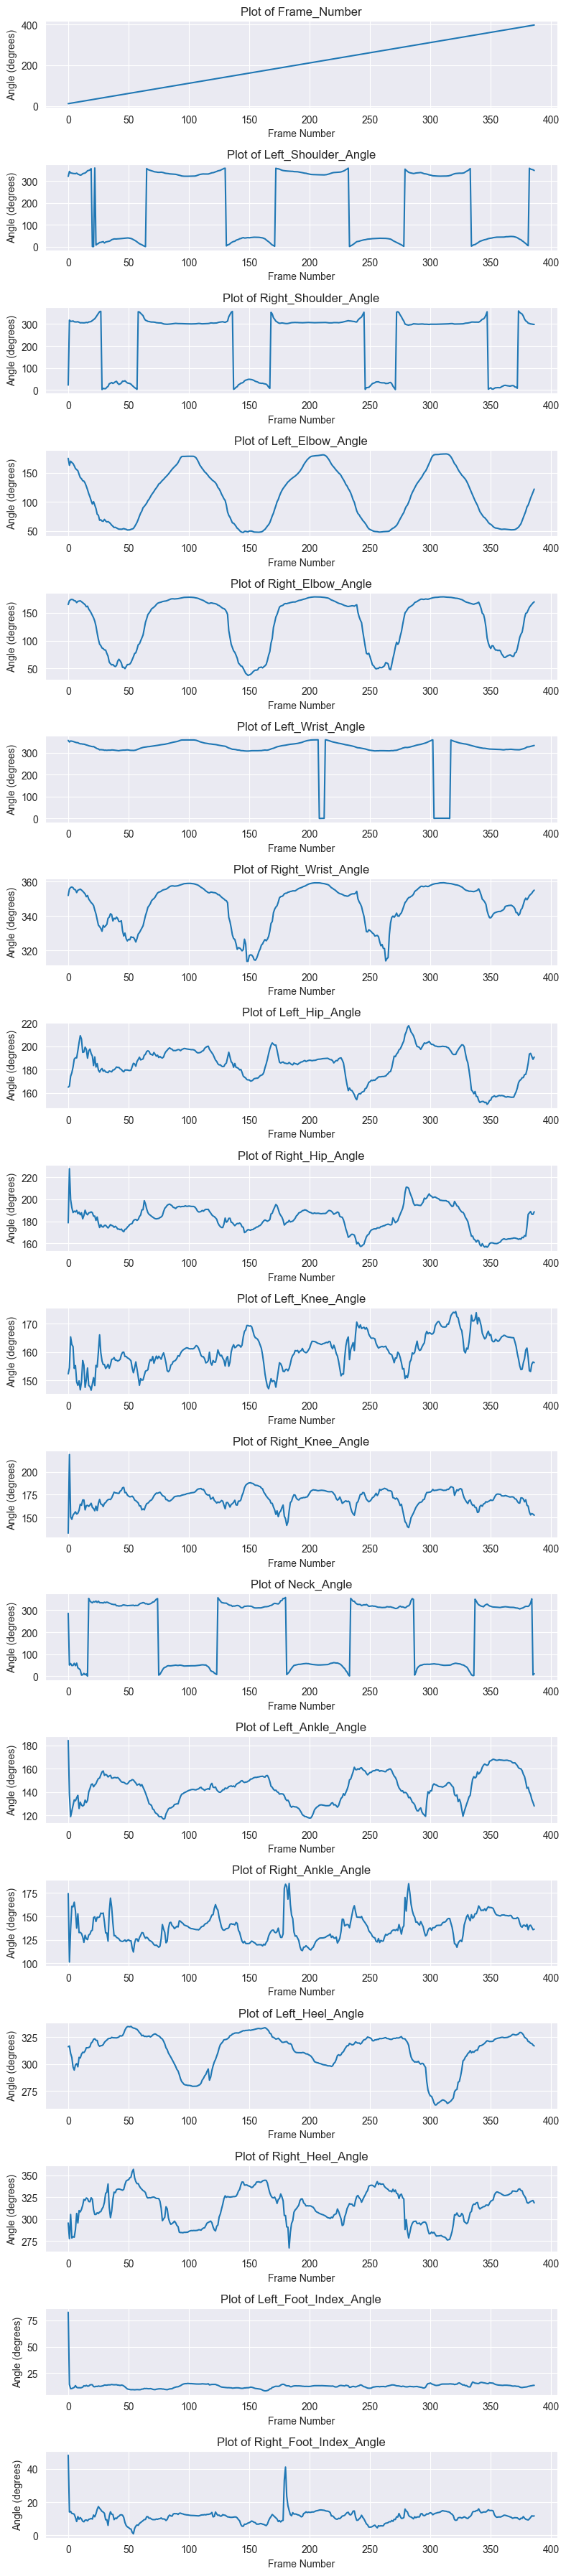

In [13]:
# Set 'Frame_Number' column as the index 
Angles_df.set_index('Frame_Number', inplace=False)

# Plot each column (angle) against the frame number in separate subplots
fig, axes = plt.subplots(nrows=len(Angles_df.columns), ncols=1, figsize=(8, 2 * len(Angles_df.columns)))

for i, column in enumerate(Angles_df.columns):
    ax = axes[i] if len(Angles_df.columns) > 1 else axes
    ax.plot(Angles_df.index, Angles_df[column])
    ax.set_xlabel('Frame Number')
    ax.set_ylabel('Angle (degrees)')
    ax.set_title(f'Plot of {column}')
    ax.grid(True)

plt.tight_layout()
plt.show()

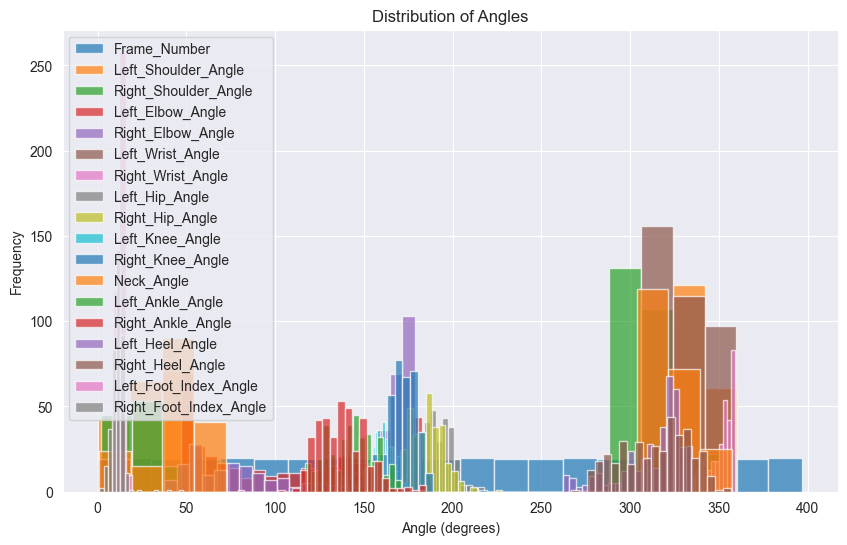

In [14]:
Angles_df.set_index('Frame_Number', inplace=False)

# Plot histograms for each column against the frame number
plt.figure(figsize=(10, 6))
for column in Angles_df.columns:
    plt.hist(Angles_df[column], bins=20, alpha=0.7, label=column)

plt.xlabel('Angle (degrees)')
plt.ylabel('Frequency')
plt.title('Distribution of Angles')
plt.legend()
plt.grid(True)
plt.show()

##Check for outliers and similarity

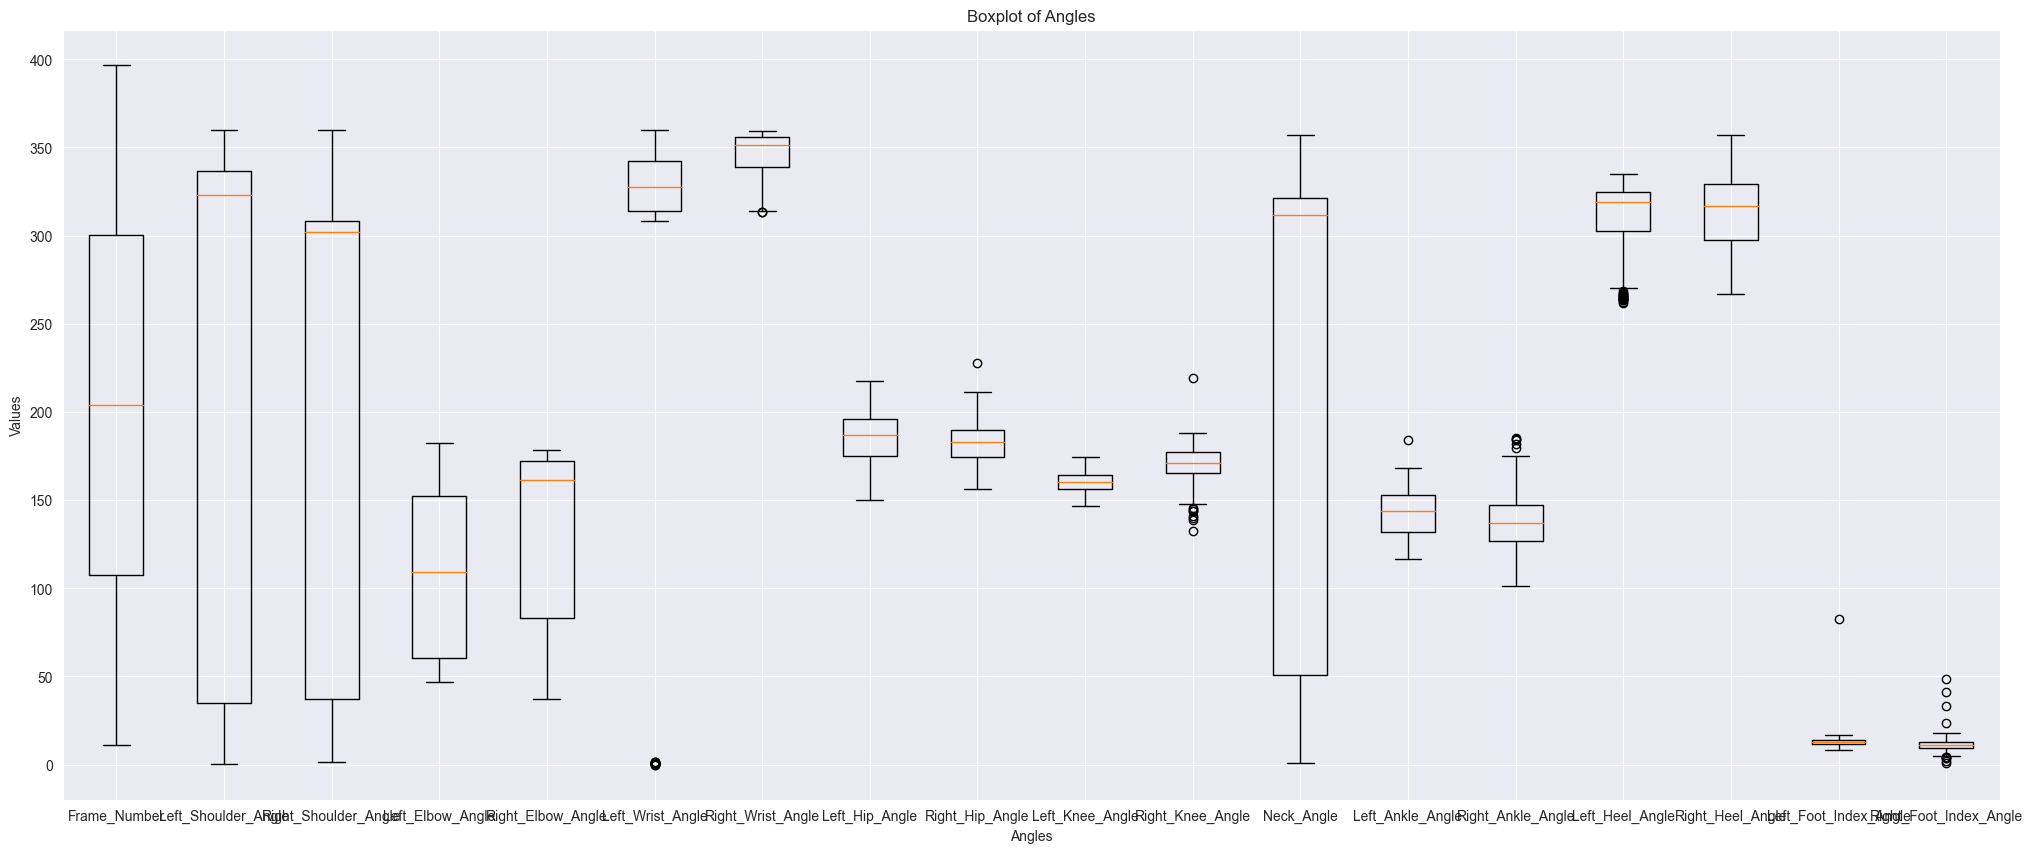

In [15]:
Angles_df.set_index('Frame_Number', inplace=False)

# Plot boxplots for each column against the frame number
plt.figure(figsize=(25, 10))  
plt.boxplot(Angles_df.values, labels=Angles_df.columns)

plt.xlabel('Angles')
plt.ylabel('Values')
plt.title('Boxplot of Angles')
# plt.legend()
plt.grid(True)
plt.show()

##Normalize data

In [16]:
Angles_df

,Frame_Number,Left_Shoulder_Angle,Right_Shoulder_Angle,Left_Elbow_Angle,Right_Elbow_Angle,Left_Wrist_Angle,Right_Wrist_Angle,Left_Hip_Angle,Right_Hip_Angle,Left_Knee_Angle,Right_Knee_Angle,Neck_Angle,Left_Ankle_Angle,Right_Ankle_Angle,Left_Heel_Angle,Right_Heel_Angle,Left_Foot_Index_Angle,Right_Foot_Index_Angle
0,11,321.401825,21.871791,174.850113,164.900213,357.076759,351.868055,164.828972,178.633216,152.282742,132.670667,285.560476,184.363632,174.424960,316.152453,295.492886,82.508505,48.328916
1,12,344.212528,317.888063,162.909836,171.681053,349.870480,355.693014,165.775858,227.926444,154.458021,219.130279,50.833785,138.131802,101.370355,316.789778,277.602971,14.418615,14.081735
2,13,337.285886,312.484949,169.991181,173.464632,354.582502,356.526316,174.229535,199.784260,165.389093,150.625724,58.090823,118.838139,136.691422,309.891405,305.248811,10.380969,14.477762
3,14,336.512367,312.757445,167.750144,174.042065,353.499613,356.803319,177.227433,192.406042,162.665008,147.902248,48.803733,123.790050,160.936282,306.163884,278.335204,10.561741,13.208880
4,15,334.964222,313.937769,165.968670,173.397460,352.456025,356.385261,182.183693,187.981711,161.959365,152.489376,49.346327,128.546625,160.212171,297.313189,279.847382,11.097680,13.106590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,393,358.562340,302.852442,99.994627,159.641628,328.070533,351.821813,193.395184,187.682500,153.386439,155.941821,321.426590,140.164901,140.164765,320.643866,319.263495,12.763898,9.924646
383,394,354.914694,300.762503,106.175721,162.616964,329.605572,352.490281,193.979480,188.921274,153.124623,152.765433,332.015422,137.929476,140.641425,319.322486,320.108819,13.090208,10.816621
384,395,353.236223,299.991363,111.189898,165.137839,331.025650,353.179882,191.325187,186.431442,155.720595,154.289443,351.098075,133.643925,138.386425,319.096806,320.818415,13.220134,11.793754
385,396,351.848019,298.769741,116.517977,167.743894,332.642947,354.257714,188.811858,186.279836,156.486992,153.552061,6.258279,131.027836,135.824422,317.713855,321.296354,13.505682,11.597966


##Save angles data to excel file

In [17]:
file_name = 'angles_data_' + video_name.split('.')[0] + '.xlsx'

Angles_df.to_excel(dataset_path + '/' + file_name, index=False)

print(f"Data saved to {file_name}")

Data saved to angles_data_PushUp2.xlsx
